In [1]:
# setup
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

#bokeh to add to webpage
from bokeh.plotting import figure, show, save, output_notebook, output_file
from bokeh.resources import CDN
from bokeh.embed import file_html

import os
output_notebook()

Loading BokehJS ...

# This project is about the popularity of board games, and what makes a board game successful.

One of my main hobbies is board games. Board games have evolved significantly from the classics, such as _Monopoly_, _Scrabble_. and _The Game of Life_. The modern boardgame is incredibly diverse, with different mechanics, from card drafting, worker-placing and resource management. 

One of the major board game sites, <a href=https://boardgamegeek.com/>_BoardGameGeek_</a>, is a platform for the community to document releases, provide ratings and reviews, and discuss the intricacies of the hobby.
This project will be using this dataset: <a href=https://www.kaggle.com/datasets/jvanelteren/boardgamegeek-reviews>BoardGameGeek Reviews</a>, as well as data gathered from the BGG XML API2.
I'll be asking questions and searching for answers throughout the project.

## What makes a board game popular?

Board games constantly get developed, funded, and released like any other form of entertainment. Game publishers and developers need to constantly evaluate their game against what's avaliable on the market already. To that end, this project will aim to ansver several questions:
<ul>
    <li><b>What kind of board games are popular on BGG?</b> If there is a type of board game that performs more highly on rank than others, that may be an indication that another would do well.</li>
    <li><b>What mechanics do BGG users perfer? What mechanics do they not like?</b> A game with mechanics that people will prefer could perhaps be more popular.</li>
    <li><b>What genre of game do BGG users perfer?</b></li>   
</ul>


## Data import and cleaning.

The dataset for this project is split into 6 CSV files. 
<ul>
    <li>A list of 15 Million reviews, collected in 2020</li>
    <li>A list of 19 Million reviews, collected in 2022</li>
    <li>A list of Board games with over 30 reviews, collected in 2020</li>
    <li>A list of Board games with over 30 reviews, collected in 2022</li>
    <li>A list of Board games with detailed information.</li>
    <li>A list of Board games, collected with the BGG XML API2, accessed 6/06/2024</li>
</ul>

In [5]:
data = "./data"
df_20 = pd.read_csv(f"{data}/2020-08-19.csv")
df_20.head()

,Unnamed: 0,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,90,30549,Pandemic,2008,91,7.62,7.518,96186,/boardgame/30549/pandemic,https://cf.geekdo-images.com/micro/img/0m3-oqB...
1,172,822,Carcassonne,2000,173,7.42,7.311,96181,/boardgame/822/carcassonne,https://cf.geekdo-images.com/micro/img/z0tTaij...
2,380,13,Catan,1995,381,7.16,7.001,96171,/boardgame/13/catan,https://cf.geekdo-images.com/micro/img/e0y6Bog...
3,49,68448,7 Wonders,2010,50,7.76,7.662,79830,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/micro/img/h-Ejv31...
4,87,36218,Dominion,2008,88,7.63,7.521,74933,/boardgame/36218/dominion,https://cf.geekdo-images.com/micro/img/VYp2s2f...


In [6]:
df_20.set_index('ID', inplace = True)

In [7]:
display(df_20[df_20.duplicated()])
df_20.isna().value_counts()

,Unnamed: 0,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
ID,,,,,,,,,


Unnamed: 0  Name   Year   Rank   Average  Bayes average  Users rated  URL    Thumbnail
False       False  False  False  False    False          False        False  False        19317
                                                                             True            13
Name: count, dtype: int64

In [8]:
# The data is very clean, with no missing values apart from 13 thumbnails. I'll drop this column, and other inimportant columns..
to_drop = ["Thumbnail", "URL", "Unnamed: 0"]
df_20.drop(to_drop, axis = 1, inplace = True)

In [9]:
df_22 = pd.read_csv(f"{data}/2022-01-08.csv")
df_22.head()

,Unnamed: 0,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,105,30549,Pandemic,2008,106,7.59,7.487,108975,/boardgame/30549/pandemic,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...
1,189,822,Carcassonne,2000,190,7.42,7.309,108738,/boardgame/822/carcassonne,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...
2,428,13,Catan,1995,429,7.14,6.970,108024,/boardgame/13/catan,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...
3,72,68448,7 Wonders,2010,73,7.74,7.634,89982,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...
4,103,36218,Dominion,2008,104,7.61,7.499,81561,/boardgame/36218/dominion,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...


In [10]:
df_22.set_index('ID', inplace = True)

In [11]:
display(df_22[df_22.duplicated()])
df_22.isna().value_counts()

,Unnamed: 0,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
ID,,,,,,,,,


Unnamed: 0  Name   Year   Rank   Average  Bayes average  Users rated  URL    Thumbnail
False       False  False  False  False    False          False        False  False        21825
                                                                             True             6
Name: count, dtype: int64

In [12]:
# The data is very clean, with no missing values apart from 6 thumbnails. I'll drop this column, and other inimportant columns..
df_22.drop(to_drop, axis = 1, inplace = True)

With just the data from the 2 lists of games, there's a few questions I'd like to ask:
<ol>
    <li>What are the highest rated games in both years?</li>
    <li>What is the average user rating in both years? Do users think the quality of games has gone up or down?</li>
    <li>How many more board games are there in 2022, compared to 2020?</li>
    <li>Which games had the highest change in rank?</li>
</ol>


### 1. What are the highest rated games in both years?

In [14]:
top20_2020 = df_20.sort_values(by='Rank').head(20)
top20_2020

,Name,Year,Rank,Average,Bayes average,Users rated
ID,,,,,,
174430,Gloomhaven,2017,1,8.82,8.569,37053
161936,Pandemic Legacy: Season 1,2015,2,8.62,8.470,38345
224517,Brass: Birmingham,2018,3,8.64,8.305,14531
167791,Terraforming Mars,2016,4,8.43,8.282,57319
233078,Twilight Imperium (Fourth Edition),2017,5,8.69,8.213,11466
182028,Through the Ages: A New Story of Civilization,2015,6,8.45,8.211,21035
220308,Gaia Project,2017,7,8.50,8.162,14270
187645,Star Wars: Rebellion,2016,8,8.42,8.160,21089
12333,Twilight Struggle,2005,9,8.30,8.148,38869


In [15]:
top20_2022 = df_22.sort_values(by='Rank').head(20)
top20_2022

,Name,Year,Rank,Average,Bayes average,Users rated
ID,,,,,,
174430,Gloomhaven,2017,1,8.74,8.511,47827
161936,Pandemic Legacy: Season 1,2015,2,8.59,8.442,45041
224517,Brass: Birmingham,2018,3,8.66,8.418,25484
167791,Terraforming Mars,2016,4,8.42,8.274,74216
233078,Twilight Imperium: Fourth Edition,2017,5,8.68,8.262,16025
291457,Gloomhaven: Jaws of the Lion,2020,6,8.68,8.260,15918
220308,Gaia Project,2017,7,8.47,8.175,19169
187645,Star Wars: Rebellion,2016,8,8.42,8.172,25586
182028,Through the Ages: A New Story of Civilization,2015,9,8.38,8.150,25605


I've chosen an arbitary value to look at the top games in. But how many games stayed in the top 20? and which ones?

In [17]:
stayed_in_top20_ids = []
for id in top20_2020.index:
    if id in top20_2022.index:
        stayed_in_top20_ids.append(id)
stayed_in_top20 = top20_2022.loc[stayed_in_top20_ids]

In [18]:
left_top20 = top20_2020[~top20_2020.index.isin(top20_2022.index)]
entered_top20 = top20_2022[~top20_2022.index.isin(top20_2020.index)]
print("These games left the top 20:")
display(left_top20)
print("These games entered the top 20:")
display(entered_top20)

These games left the top 20:


,Name,Year,Rank,Average,Bayes average,Users rated
ID,,,,,,
205637,Arkham Horror: The Card Game,2016,19,8.19,7.929,25045
266192,Wingspan,2019,20,8.11,7.925,32712


These games entered the top 20:


,Name,Year,Rank,Average,Bayes average,Users rated
ID,,,,,,
291457,Gloomhaven: Jaws of the Lion,2020,6,8.68,8.260,15918
167355,Nemesis,2018,17,8.39,7.982,17688


In [19]:
#What is the average score for both years?
avg_2022 = df_22['Average'].mean()
avg_2020 = df_20['Average'].mean()
print(f"The average score in 2020 was: {avg_2020} \nThe average score in 2022 was: {avg_2022}")

# How many games beat the average?
beat_avg_22 = (df_22['Average'] > avg_2022).sum()
beat_avg_20 = (df_20['Average'] > avg_2020).sum()
print(f"In 2020, {beat_avg_20} games beat the average. In 2022, {beat_avg_22} games beat the average.")

The average score in 2020 was: 6.392255561303674 
The average score in 2022 was: 6.416960285832074
In 2020, 9880 games beat the average. In 2022, 11240 games beat the average.


In [20]:
# How about the games that lost/gained the most ranks?

df_22_rank_change = df_22.copy()

def rank_change(id):
    return df_20.loc[id]['Rank'] - df_22.loc[id]['Rank']

ids_20 = df_20.index
ids_22 = df_22.index
## check if a game is in both and calculate the change:
for id in ids_22:
    if id in ids_20:
        change = rank_change(id)
        df_22_rank_change.loc[id,'Ranked change'] = change


df_22_rank_change.sample(3)


,Name,Year,Rank,Average,Bayes average,Users rated,Ranked change
ID,,,,,,,
237153,Fruit Ninja: Combo Party,2018,18074,5.59,5.500,150,-3467.0
8903,Zama: Hannibal versus Scipio,1992,17124,5.62,5.506,78,-1838.0
295604,Rangers of Shadow Deep: Deluxe Edition,2020,7792,8.78,5.592,64,NaN


In [21]:
print("The games that gained the most ranks were:")
display(df_22_rank_change.sort_values(by= 'Ranked change', ascending=False).head(3))
print("The games that lost the most ranks were:")
display(df_22_rank_change.sort_values(by= 'Ranked change', ascending=False, na_position ='first' ).tail(3))

The games that gained the most ranks were:


,Name,Year,Rank,Average,Bayes average,Users rated,Ranked change
ID,,,,,,,
273703,Altar Quest,2020,1500,7.92,6.291,972,11349.0
281515,Company of Heroes,2021,2624,8.83,5.984,401,10259.0
295905,Cosmic Frog,2020,2514,7.53,6.005,580,10234.0


The games that lost the most ranks were:


,Name,Year,Rank,Average,Bayes average,Users rated,Ranked change
ID,,,,,,,
236639,Flaming Pyramids,2018,20185,5.41,5.479,283,-8267.0
212027,Balloon Pop!,2017,21440,5.05,5.426,314,-8788.0
240463,Tournament Fishing: The Deckbuilding Game,2017,21633,5.02,5.374,352,-14758.0


In [22]:
#Actually not that interesting until we find out how many new games were added to the catalogue, and how many were taken away...
# Checks in first list/in second list condition
df_removed = df_20[~df_20.index.isin(df_22.index)]
df_added = df_22[~df_22.index.isin(df_20.index)]
removed_no = df_removed.shape[0]
added_no = df_added.shape[0]
print(f"BGG removed {removed_no} games, and added {added_no} games.")

BGG removed 48 games, and added 2549 games.


In [23]:
# What year were the most games released?
years_srs = df_22['Year'].value_counts()
#How many years have the fewest games?
years_srs[years_srs == years_srs.min()].count()

60

In [24]:
years_srs.sort_index(inplace = True)
years_srs = years_srs.loc[1970:2021]

In [25]:
years_df = pd.DataFrame({'Year': years_srs.index, 'Count': years_srs.values})

In [45]:
# bokeh plot to show on site page
plot = figure()
title = "Distribution of Board Games recorded on BGG by release date"
plot.line(x = 'Year',
          y = 'Count',
          source = years_df)
plot.title = title
plot.xaxis.axis_label = "Year"
plot.yaxis.axis_label = "Games Released"
plot.sizing_mode("scale_both")
path = r"./plots/"
if not os.path.exists(path):
    os.mkdir(path)
x = save(plot,title = title,resources ='inline',  filename = r"./plots/BGG-release-years.html")

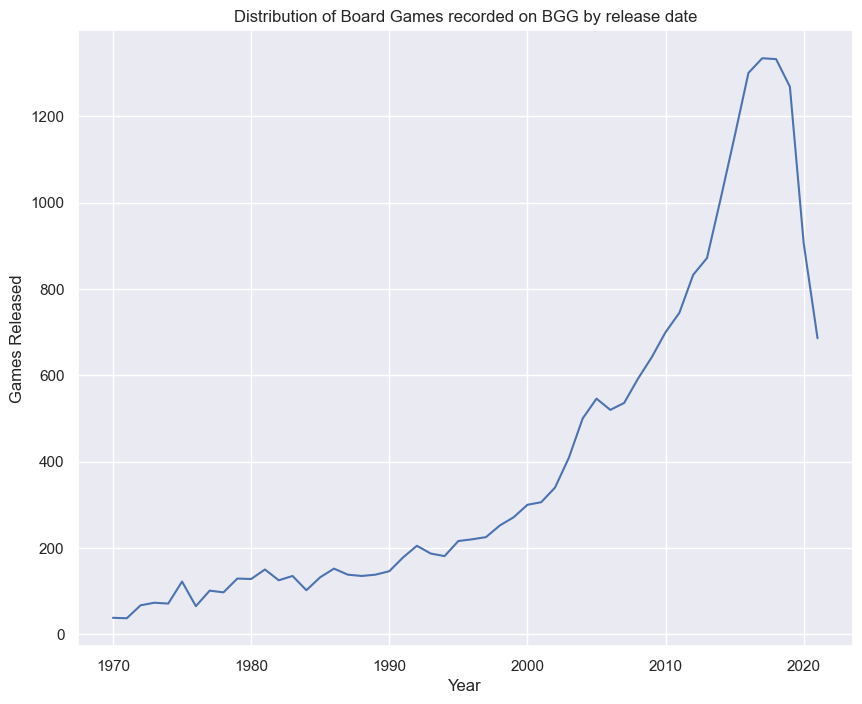

In [49]:
#What the distribution of board games like, in terms of release date?
sns.set_theme()
plt.figure(figsize=(10,8))
year_distrib = sns.lineplot(x = years_srs.index,y=years_srs.values, legend = False)
plt.title(title)
plt.ylabel("Games Released")
plt.show()

We can see here that the amount of released board games has increased by a large amount since 1970, with a dip in 2020, probably due to the COVID-19 pandemic, as people were unable to socialise physically. 

Whilst this information is nice, it's not that useful from an analysis standpoint. What makes these games so good? What kind of game do BGG users like?

Let's start by getting more information on the games.

In [ ]:
# Got a Dtype warning on first run, specifying dType of columns 29:Board Game Rank, and 49: Children's game rank
dtypes = { "Board Game Rank" : str,
           "Children's Game Rank": str
         }
df_game_details = pd.read_csv(f"{data}/games_detailed_info.csv", dtype = dtypes)
df_game_details.head()
df_game_details.set_index('id', inplace = True)

In [ ]:
df_game_details.info()

This dataset is an expanded verion of the 2022 dataset that we used to compare to the 2020 dataset, including many of the same columns. 
There seems to be only 1 game for columns 48-54. I thought that was strange, so it's time to look into it.

In [ ]:
display(df_game_details[df_game_details['RPG Item Rank'].notna()].index,
df_game_details[df_game_details['Accessory Rank'].notna()].index,
df_game_details[df_game_details['Video Game Rank'].notna()].index,
df_game_details[df_game_details['Amiga Rank'].notna()].index,
df_game_details[df_game_details['Commodore 64 Rank'].notna()].index,
df_game_details[df_game_details['Arcade Rank'].notna()].index,
df_game_details[df_game_details['Atari ST Rank'].notna()].index)

There are 3 entries with strange ranks: `234669, 5985, 91313`. What are they? 

In [ ]:
df_game_details[df_game_details['RPG Item Rank'].notna() | df_game_details['Accessory Rank'].notna() | df_game_details['Video Game Rank'].notna()][['type','primary','Board Game Rank']]

`Miscellaneous Game Accessory` doesn't seem like a game - so might be worth dropping from the dataframe.
`Ataxx` is a videogame that has a ruleset that can be re-created on a reversi board, but was never sold as a boardgame by itself.
`Legacy of Dragonholt` is a tabletop RPG, so this entry will be staying.

There are more columns that I'm interested in, and it will probably be worth taking a closer look:

In [ ]:
interesting_columns = ['primary','Board Game Rank','usersrated','average','bayesaverage','stddev','median']
display(df_game_details[interesting_columns].sort_values(by='bayesaverage', ascending = False).head(5))
display(df_game_details[interesting_columns].sort_values(by='average', ascending = False).head(5))

These columms are interesting, as they provide information on the review scores of the games. BGG ranks games based on the `bayesaverage` column, or 'Geek Rating'. This appears to be done primarily to reduce the chance that games with high avarages and low review scores, such as the top 5 sorted by average, get to the top of the rankings. The way that the bayes average is worked out is unknown, as to avoid people gaming the system.

A low standard deviation in this case would mean that people are consistently rating the game close to the average score.
The median column that I pulled, thinking it would be the median rating, appears to not be the case.

In [ ]:
df_game_details['median'].unique()

Since the only value is `median` is `0`, I'll just drop the column, as it doesn't provide any useful information. I'll also be dropping the columns with a low amount of entries, a low amount of unique values, or columns that hold unintresting data.

In [ ]:
cols_to_drop = [
    'Unnamed: 0',
    'type',
    'thumbnail',
    'image',
    'alternate',
    'median',
    'RPG Item Rank',
    'Accessory Rank',
    'Video Game Rank',
    'Amiga Rank',
    'Commodore 64 Rank',
    'Arcade Rank',
    'Atari ST Rank'
    ]
df_game_details.drop(cols_to_drop, axis = 1, inplace = True)
df_game_details.drop([5985,91313], inplace = True)

In [ ]:
df_game_details.shape

## What kind of board games <b>ARE</b> popular on BGG?

First of all, lets define what a popualar game is. There's no real metric for this, but I'll use the games that have the 80th percentile of reviews, as a large amount of players will have played the game.

In [ ]:
twentypercent = round(df_game_details.shape[0] * 0.2)
print(twentypercent)
df_most_popular = df_game_details.sort_values(by ='usersrated', ascending = False).head(twentypercent)
pop_columns = ['primary','usersrated', 'Board Game Rank']
display(df_most_popular.tail(3)[pop_columns])

560 people rated the last game, but there might be more games than the 4326 that were rated by at least 560 people what were excluded from the search, to make this fair,
I'll include all games with at least 560 ratings.

In [ ]:
have_560_ratings = df_game_details['usersrated'] >= 560
df_most_popular_2 = df_game_details[have_560_ratings]
df_most_popular_2.shape[0]

In this case, there were not any more games. <br>
Now to check that category each game is in:

In [ ]:
import ast
#A game may be in one or more categories, and potententially all of the games could hava a unique list of categories they belong to. To rectify this, I'll be compiling a dictionary with each individual value:
def parse_column(column:pd.Series):
    """Parses a column on the BGG table.
    Input: pd.Series
    Returns: dictionary with counts of each category
    """
    outdict = {}
    for entry in column:
        if type(entry) != str:
            continue
        entry_list = ast.literal_eval(entry) #Needs to be parsed into a python literal list to perform computation
        for x in entry_list:
            if x in outdict.keys():
                outdict[x] += 1
            else:
                outdict[x] = 1
    return outdict

In [ ]:
dict_game_categories = parse_column(df_most_popular_2['boardgamecategory'])

In [ ]:
all_categories = pd.Series(data = dict_game_categories).sort_values(ascending=False)
top_categories = all_categories.head(20)

In [ ]:
plt.figure(figsize=(15,8))

top_category_plot = sns.barplot(x=top_categories.index, y=top_categories.values, hue = top_categories.index)
#top_category_plot.set_xticklabels(top_category_plot.get_xticklabels(), rotation=40, ha="right")
for container in top_category_plot.containers:
    top_category_plot.bar_label(container)

plt.title('Top 20 categories of Most Popular Board Games on Board Game Geek (n=4326)')
plt.xticks(rotation=40, ha='right')
plt.xlabel('Category')
plt.ylabel('Count')

plt.show()

As shown here, the most poopular category is `Card Game` with 1340 games, followed by `Fantasy` with 740 games, with `Economic` at third with 523.

This helps us answer the question: "What **genre** do BGG users like?"
BGG doesn't have "genres" per se, but categories include all the genres, and then some.

In [ ]:
print(f"There are {len(all_categories.index)} categories in the top 20% of games.")

There are also 83 categories in total on BGG, which gives a 100% representation rate.

In [ ]:
# Distriubtion of categories for all games
allgames_allcats_dict = parse_column(df_game_details['boardgamecategory'])
allgames_allcats_series = pd.Series(data= allgames_allcats_dict).sort_values(ascending = False)
allgames_topcats_series = allgames_allcats_series.head(20)

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Top 20 Categories for All Board Games on Board Game Geek')
all_games_topcats_plot = sns.barplot(x=allgames_topcats_series.index, y = allgames_topcats_series.values, hue = allgames_topcats_series.index)
plt.xticks(rotation=40, ha='right')
for container in all_games_topcats_plot.containers:
    all_games_topcats_plot.bar_label(container)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Comparing the distributon of the categories of the set of all games and the subset of popular games, there are several insights to be gained:
<ol>
    <li>Card games have the hightest number of entries by quite a margin - I speculate that the ubiquity of card games has a couple of big reasons:Cards are cheap compared to other pieces - printing cards has lower costs compared to producing minitures or dice for a game.</li>
    <li>Fantasy seems to be the most popular "traditional" theme, both in terms game entries and popularity</li>
    <li>Just over 1 in every 10 war games make the top 20% in terms of popularity, but even with less games overall, over one-third of Economics games make the top in terms of popularity.</li>
</ol>

Board Game Geek also differenciates games based on the mechanics of each game:

In [ ]:
# sns.set_palette(sns.color_palette())
mechanics_dict = parse_column(df_most_popular_2['boardgamemechanic'])
all_mechanics = pd.Series(data = mechanics_dict).sort_values(ascending=False)
top_mechanics = all_mechanics.head(20)
plt.figure(figsize=(15,8))
plt.title('Top 20 Mechanics of Most Popular Board Games on Board Game Geek (n=4326)')
plt.xticks(rotation=40, ha='right')
plt.ylabel('Count')
top_mechanic_plot = sns.barplot(x=top_mechanics.index, y=top_mechanics.values,hue = top_categories.index, legend = False)
#top_mechanic_plot.set_xticklabels(top_mechanic_plot.get_xticklabels(), rotation=40, ha="right")
for container in top_mechanic_plot.containers:
    top_mechanic_plot.bar_label(container)
plt.xlabel('Mechanic')

plt.show()

As shown, the top mechanics are `Hand management`, `Dice Rolling` and `Variable Player Powers`.

In [ ]:
print(f"There are {len(all_mechanics.index)} mechanics in the top 20% of games.")

There are 192 mechanics in total on BGG so 10 of those mechanics are not represented in the top 20%.

In [ ]:
allgames_allmechs_dict = parse_column(df_game_details['boardgamemechanic'])
allgames_allmechs_series = pd.Series(data= allgames_allmechs_dict).sort_values(ascending = False)
allgames_allmechs_series = allgames_allmechs_series.head(20)


plt.figure(figsize=(15,8))
plt.title('Top 20 Mechanics of All Board Games on Board Game Geek')
plt.xticks(rotation=40, ha='right')
plt.ylabel('Count')
all_mechanic_plot = sns.barplot(x=allgames_allmechs_series.index, y=allgames_allmechs_series.values,hue = allgames_allmechs_series.index, legend = False)
#top_mechanic_plot.set_xticklabels(top_mechanic_plot.get_xticklabels(), rotation=40, ha="right")
for container in all_mechanic_plot.containers:
    all_mechanic_plot.bar_label(container)
plt.xlabel('Mechanic')

plt.show()

It seems as through to make a popular game, you'll need to be a Fantasy Economic Card Game, with Hand Manageement, Dice rolling and Variable player powers.
However, there's a liklihood that the mechanics may be connected to the categories, and vice versa.

## How do the Categories intersect with the mechanics? 

I'll focus on the top 20% of games still, as that's the data I'm interested in, and work with the top 10 categories and mechanics, for easier viewing.

In [ ]:
def parse_column_series(column:pd.Series):
    output = []
    for entry in column:
        if type(entry) == str:
            entryli = ast.literal_eval(entry)
            output.append(entryli)
        else:
            output.append(entry)
    return output

In [ ]:
cata_list = parse_column_series(df_most_popular_2['boardgamecategory'])
mechanic_list = parse_column_series(df_most_popular_2['boardgamemechanic'])
if len(cata_list) != len(mechanic_list):
    raise Exception(f"Lists not the same size. \ncategory: {len(cata_list)}\nMechanic: {len(mechanic_list)} ")

In [ ]:
index = 0
game_cata_mech_dict = {}
for item in zip(cata_list, mechanic_list):
    key = df_most_popular_2['primary'].values[index]
    game_cata_mech_dict[key] = item
    index += 1


In [ ]:
cata_mech_dict = {}
for game in game_cata_mech_dict.values():
    catas = game[0]
    mechs = game[1]
    if type(catas) != float:
        if type(mechs) != float:
            for cata in catas:
                cata_entry = cata_mech_dict.setdefault(cata,{})
                for mech in mechs:
                    cata_mech_entry = cata_entry.setdefault(mech,0)
                    cata_entry[mech] = cata_entry[mech] + 1

In [ ]:
cata_mech_df = pd.DataFrame.from_dict(cata_mech_dict)

In [ ]:
top_10_cata = all_categories.index[0:10]
top_10_mech = all_mechanics.index[0:10]
top_10_both_df = cata_mech_df.loc[top_10_mech,top_10_cata]

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(data=top_10_both_df, annot=True, fmt="n")

plt.title(f"The amount of intersection of the Top 10 Categories on BGG vs the Top 10 Mechanics on BGG")
plt.xlabel('Category')
plt.ylabel('Mechanic')
plt.show()

As we can see, the crossover between some mechanics and categories is very high. Over half of the `Card Games` category involve `Hand Management` as a mechanic. There's also a high crossover between `Dice Rolling` and the categories, and `Variable Player Powers` and the categories.

In [ ]:
dice_rolling_series = cata_mech_df.loc['Dice Rolling'].sort_values(ascending = False).head(10)

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Most used mechanics of games of the category "Dice Rolling"')
dice_roll_plot = sns.barplot(x=dice_rolling_series.index, y = dice_rolling_series.values, hue = dice_rolling_series.index)
plt.xticks(rotation=40, ha='right')
plt.ylabel('Count')
#dice_roll_plot.set_xticklabels(dice_roll_plot.get_xticklabels(), rotation=40, ha="right")
for container in dice_roll_plot.containers:
    dice_roll_plot.bar_label(container)

plt.xlabel('Mechanics')
plt.show()

In [ ]:
all_mechanics['Dice Rolling']

In [ ]:
(1-cata_mech_df.loc['Dice Rolling','Dice']/all_mechanics['Dice Rolling'])*100

What if a company had already decided on a `Dice Rolling` game?
In such a case, I've looked at the top 10 categories that match `Dice Rolling`. `Dice` as a category makes a lot of sense, as they are essentially mandatory to such a mechanic. What is interesting, however, is that the number of games with `Dice Rolling` as a mechanic, but don't have dice as a category, is very high, with more than 70% of games involving Dice Rolling not involving dice. Here's an example of a game like this:

### Wingspan

In [ ]:
game_cata_mech_dict.get('Wingspan')

*Wingspan* is a game where one of the mechanics involves rolling dice in a dice tower. However, it doesn't have the dice tag. This is probably because it doesn't use traditional dice, rather, it uses custom dice:
<br>
<img src='./img/wingspan_dice.webp' height = 400 width = 600>
<br>

In [ ]:
for entry in game_cata_mech_dict.keys():
    if (('Dice Rolling' in game_cata_mech_dict[entry][1]) and ('Dice' not in game_cata_mech_dict[entry][0])):
        print(entry)
        break

Looking at *Catan* however, this hypothesis is proven invalid, as *Catan* uses 2 traditional dice as part of its gamaplay.
The <a href= https://boardgamegeek.com/boardgamecategory/1017/dice>Dice</a> category on BGG, however explains it:
> Dice games often use dice as its sole or principal component. Dice games traditionally focus almost exclusively on dice rolling as a mechanic.

This explains the discrepency, and provides us with more context.

Either way, such a company would probably want to lean towards the catagories of `Dice`, `Wargames`, `Fantasy` or `Fighting`.

This does make me think, however, how does this mechanic overlap with the other mechanics?

In [ ]:
dice_overlap_dict = {}


for game in mechanic_list:
    if type(game) == float:
        continue
    if ('Dice Rolling' in game):
        if len(game) == 1:
            entry = dice_overlap_dict.setdefault(None,0)
            dice_overlap_dict[None] = entry + 1
        else:
            for mechanic in game:
                if mechanic == 'Dice Rolling':
                    continue
                entry = dice_overlap_dict.setdefault(mechanic, 0)
                dice_overlap_dict[mechanic] = entry + 1

In [ ]:
def find_overlap(overlapper, list):
    outDict = {}
    for game in list:
        if type(game) == float:
            continue
        if (overlapper in game):
            if len(game) == 1:
                entry = outDict.setdefault(None,0)
                outDict[None] = entry + 1
            else:
                for thing in game:
                    if thing == overlapper:
                        continue
                    entry = outDict.setdefault(thing, 0)
                    outDict[thing] = entry + 1
    return outDict

In [ ]:
dice_overlap_dict = find_overlap('Dice Rolling', mechanic_list)

In [ ]:
dice_overlap_series = pd.Series(data= dice_overlap_dict).sort_values(ascending = False)
top_dice_overlap = dice_overlap_series.head(10)

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Most paired catagories with "Dice Rolling"')
top_dice_overlap_plot = sns.barplot(x=top_dice_overlap.index, y = top_dice_overlap.values, hue = top_dice_overlap.index)
plt.xticks(rotation=40, ha='right')
for container in top_dice_overlap_plot.containers:
    top_dice_overlap_plot.bar_label(container)

plt.xlabel('Category')
plt.ylabel('Count')

plt.show()

Here, we can see a company that might want to develop a game with `Dice Rolling` might want to do more research in `Variable Player Powers` , `Hand Managment`, and `Modular Boards`. However, there is also a need to consider that there were 1233 `Dice Rolling` game in total, meaning that 443 games only covers just over one third of the results.

In [ ]:
HM_overlap_dict = find_overlap('Hand Management', mechanic_list)
HM_overlap_series = pd.Series(data= HM_overlap_dict).sort_values(ascending = False)
top_HMe_overlap = HM_overlap_series.head(10)

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Most paired catagories with "Hand Management"')
top_HMe_overlap_plot = sns.barplot(x=top_HMe_overlap.index, y = top_HMe_overlap.values, hue = top_HMe_overlap.index)
plt.xticks(rotation=40, ha='right')
for container in top_HMe_overlap_plot.containers:
    top_HMe_overlap_plot.bar_label(container)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Here is an equivilent chart for `Hand Management`. `Dice Rolling` is not in the top 3 in terms of overlap, beaten by `Variable plauer Powers`, `Set Collection`, and `Card Drafting`.

In [ ]:
# Distriubtion of categories & genres for every dataset
allgames_allmechs_dict = parse_column(df_game_details['boardgamemechanic'])
allgames_allmechs_series = pd.Series(data= allgames_allmechs_dict).sort_values(ascending = False)
allgames_top10mechs_series = allgames_allmechs_series.head(10)

In [ ]:
allgames_top10mechs_series

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Top 10 mechanics for all games')
all_games_topt10mechs_plot = sns.barplot(x=allgames_top10mechs_series.index, y = allgames_top10mechs_series.values, hue = allgames_top10mechs_series.index)
plt.xticks(rotation=40, ha='right')
for container in all_games_topt10mechs_plot.containers:
    all_games_topt10mechs_plot.bar_label(container)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Conclusion, Recommendations & Limitations

After looking at the data, what can be drawn from the insights?
It appears as through the most popular types of games are Card Games, Fantasy and Economic Games, whilst the most popular games are 